In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv("rfm_data.csv")
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [6]:
df.drop_duplicates(inplace=True)
df["PYear"]=df["PurchaseDate"].dt.year
df["PMonth"]=df["PurchaseDate"].dt.month
df["PDay"]=df["PurchaseDate"].dt.day
df["PWeekday"]=df["PurchaseDate"].dt.weekday+1
df["PYearMonth"]=df["PurchaseDate"].dt.strftime("%Y-%m")

df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,PYear,PMonth,PDay,PWeekday,PYearMonth
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,2023,4,11,2,2023-04
1,2188,2023-04-11,463.70,Product A,176819,London,2023,4,11,2,2023-04
2,4608,2023-04-11,80.28,Product A,340062,New York,2023,4,11,2,2023-04
3,2559,2023-04-11,221.29,Product A,239145,London,2023,4,11,2,2023-04
4,9482,2023-04-11,739.56,Product A,194545,Paris,2023,4,11,2,2023-04


In [7]:
print("The most recent purchase date is:",df["PurchaseDate"].max())
print("The first purchase date is:",df["PurchaseDate"].min())

The most recent purchase date is: 2023-06-10 00:00:00
The first purchase date is: 2023-04-11 00:00:00


In [8]:
df.describe()

,CustomerID,PurchaseDate,TransactionAmount,OrderID,PYear,PMonth,PDay,PWeekday
count,1000.000000,1000,1000.00000,1000.000000,1000.0,1000.00000,1000.000000,1000.00000
mean,5554.789000,2023-05-10 07:27:50.400000,513.67781,554071.398000,2023.0,4.80300,16.077000,3.97600
min,1011.000000,2023-04-11 00:00:00,12.13000,100096.000000,2023.0,4.00000,1.000000,1.00000
25%,3273.000000,2023-04-26 00:00:00,257.12000,313152.000000,2023.0,4.00000,8.000000,2.00000
50%,5538.000000,2023-05-09 00:00:00,523.56500,564671.500000,2023.0,5.00000,16.000000,4.00000
75%,7821.750000,2023-05-26 00:00:00,759.86000,783052.250000,2023.0,5.00000,25.000000,6.00000
max,9991.000000,2023-06-10 00:00:00,999.44000,999695.000000,2023.0,6.00000,31.000000,7.00000
std,2605.014863,NaN,286.09870,264695.448814,0.0,0.66831,9.224107,1.97771


In [9]:
df.describe(include="object")

,ProductInformation,Location,PYearMonth
count,1000,1000,1000
unique,4,4,3
top,Product C,Tokyo,2023-05
freq,277,278,515


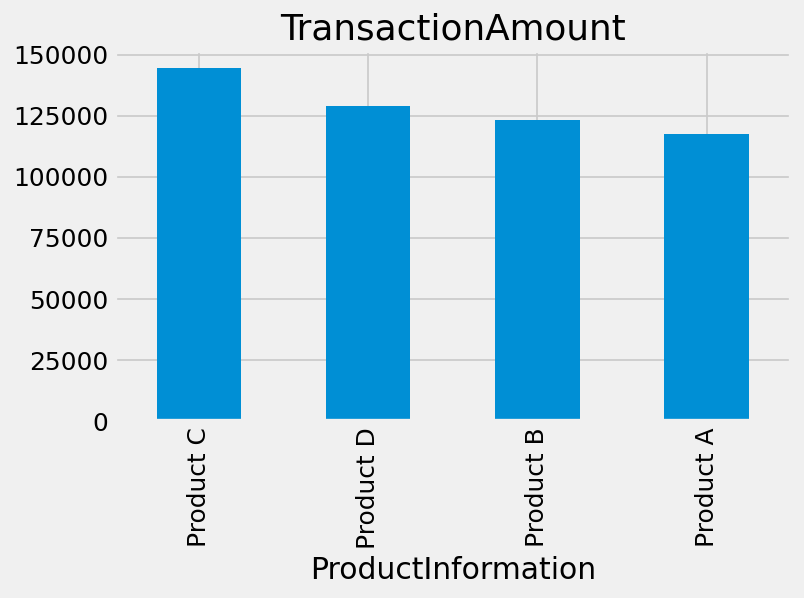

In [19]:
df_category = df.groupby("ProductInformation").agg({"TransactionAmount":"sum"})

fig,ax = plt.subplots(dpi=128, figsize=(12,8))
for i, col in enumerate(["TransactionAmount"],1):
    plt.subplot(2,2,i)
    df_category[col].sort_values(ascending = False).plot(kind="bar")
    plt.title(col)
plt.tight_layout()
plt.show()

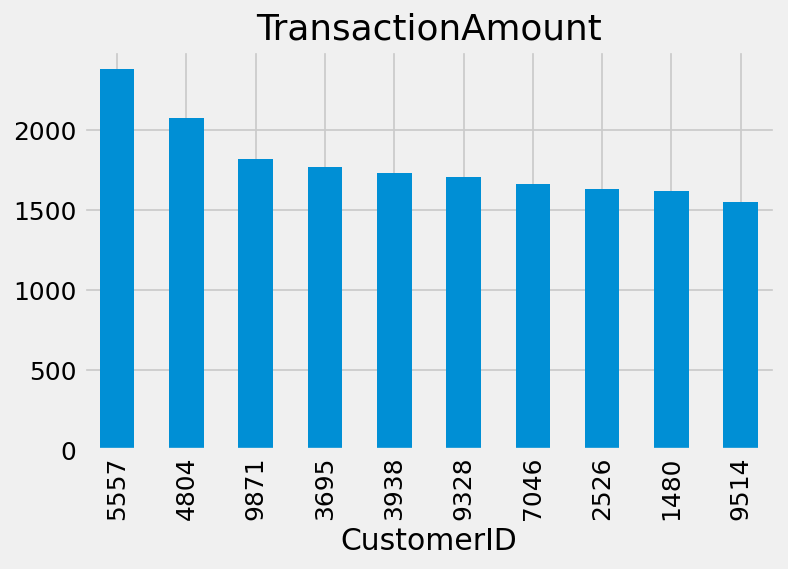

In [17]:
df_order = df.groupby("CustomerID").agg({"TransactionAmount":"sum"})

fig,ax = plt.subplots(dpi=128, figsize=(12,8))
for i, col in enumerate(["TransactionAmount"],1):
    plt.subplot(2,2,i)
    df_order[col].sort_values(ascending = False)[0:10].plot(kind="bar")
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
df_RFM = df.groupby("CustomerID").agg({"PurchaseDate": lambda x:(df["PurchaseDate"].max()-x.max()).days,
                                         "OrderID":"nunique",
                                         "TransactionAmount":"sum",
                                      })
df_RFM.rename(columns={"PurchaseDate":"Recency","OrderID":"Frequency","Transaction":"Monetary"},inplace=True)
DiffYears = df.groupby("CustomerID").agg({"PurchaseDate": lambda x: x.dt.year.max()-x.dt.year.min()+1}).rename(columns={"PurchaseDate":"DiffYears"}).DiffYears
df_RFM["Frequency"] = df_RFM["Frequency"]/DiffYears
df_RFM.head()

,Recency,Frequency,TransactionAmount
CustomerID,,,
1011,33,2.0,1129.02
1025,21,1.0,359.29
1029,0,1.0,704.99
1046,43,1.0,859.82
1049,13,1.0,225.72
